## 1. Environment Setup

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tqdm import tqdm
import time

import src.config as config
from src.model import create_model, count_parameters
from src.data import create_dataloaders, get_dataset_statistics
from src.train import train_model
from src.evaluate import evaluate_model, generate_classification_report, calculate_per_class_metrics
from src.utils import plot_training_history, plot_confusion_matrix

torch.manual_seed(config.RANDOM_SEED)
np.random.seed(config.RANDOM_SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(config.RANDOM_SEED)

In [2]:
print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA Version: {torch.version.cuda}")
    print(f"GPU Device: {torch.cuda.get_device_name(0)}")
print(f"Device: {config.DEVICE}")

PyTorch Version: 2.5.1+cu121
CUDA Available: True
CUDA Version: 12.1
GPU Device: NVIDIA GeForce RTX 3050 Laptop GPU
Device: cuda


## 2. Dataset Preparation

In [3]:
train_loader, val_loader, test_loader = create_dataloaders(
    batch_size=config.BATCH_SIZE,
    num_workers=2
)

stats = get_dataset_statistics()
print(f"Training samples: {stats['train_size']}")
print(f"Validation samples: {stats['val_size']}")
print(f"Test samples: {stats['test_size']}")
print(f"Classes: {', '.join(config.CLASS_NAMES)}")

Training samples: 3251
Validation samples: 416
Test samples: 405
Classes: Early_Blight, Healthy, Late_Blight


## 3. Custom CNN Model

In [4]:
cnn_model, cnn_history = train_model(
    model_type='cnn',
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=20,
    learning_rate=config.LEARNING_RATE,
    device=config.DEVICE
)

Created Custom CNN model

Custom CNN Model Summary:
Total parameters: 6,944,515
Trainable parameters: 6,944,515
Non-trainable parameters: 0

Architecture:
- Conv Block 1: 3 -> 32 channels
- Conv Block 2: 32 -> 64 channels
- Conv Block 3: 64 -> 128 channels
- Conv Block 4: 128 -> 256 channels
- FC Layer 1: 12544 -> 512
- FC Layer 2: 512 -> 256
- Output Layer: 256 -> 3
- Dropout Rate: 0.5


Starting training: cnn_model
Device: cuda
Epochs: 20
Learning rate: 0.001
Batch size: 32


Custom CNN Model Summary:
Total parameters: 6,944,515
Trainable parameters: 6,944,515
Non-trainable parameters: 0

Architecture:
- Conv Block 1: 3 -> 32 channels
- Conv Block 2: 32 -> 64 channels
- Conv Block 3: 64 -> 128 channels
- Conv Block 4: 128 -> 256 channels
- FC Layer 1: 12544 -> 512
- FC Layer 2: 512 -> 256
- Output Layer: 256 -> 3
- Dropout Rate: 0.5


Starting training: cnn_model
Device: cuda
Epochs: 20
Learning rate: 0.001
Batch size: 32



Saved best model to c:\Users\Mikhael\Documents\Deep-Learning-AOL\checkpoints\cnn_model_best.pth
Epoch [1/20] - 58.45s
  Train Loss: 1.0043 | Train Acc: 47.28%
  Val Loss:   0.7908 | Val Acc:   67.07%
  LR: 0.001000
  *** New best model! ***



Saved best model to c:\Users\Mikhael\Documents\Deep-Learning-AOL\checkpoints\cnn_model_best.pth
Epoch [2/20] - 31.80s
  Train Loss: 0.8662 | Train Acc: 60.01%
  Val Loss:   0.7606 | Val Acc:   66.11%
  LR: 0.001000
  *** New best model! ***



Saved best model to c:\Users\Mikhael\Documents\Deep-Learning-AOL\checkpoints\cnn_model_best.pth
Epoch [3/20] - 30.13s
  Train Loss: 0.8100 | Train Acc: 64.13%
  Val Loss:   0.7249 | Val Acc:   71.63%
  LR: 0.001000
  *** New best model! ***



Saved best model to c:\Users\Mikhael\Documents\Deep-Learning-AOL\checkpoints\cnn_model_best.pth
Epoch [4/20] - 30.57s
  Train Loss: 0.7309 | Train Acc: 69.21%
  Val Loss:   0.6024 | Val Acc:   76.92%
  LR: 0.001000
  *** New best model! ***



Epoch [5/20] - 30.15s
  Train Loss: 0.6520 | Train Acc: 72.75%
  Val Loss:   0.6775 | Val Acc:   71.15%
  LR: 0.001000

EarlyStopping counter: 1/5


Epoch [6/20] - 29.20s
  Train Loss: 0.5563 | Train Acc: 78.44%
  Val Loss:   0.9263 | Val Acc:   63.46%
  LR: 0.001000

EarlyStopping counter: 2/5


Saved best model to c:\Users\Mikhael\Documents\Deep-Learning-AOL\checkpoints\cnn_model_best.pth
Epoch [7/20] - 29.48s
  Train Loss: 0.4906 | Train Acc: 80.71%
  Val Loss:   0.2703 | Val Acc:   89.90%
  LR: 0.001000
  *** New best model! ***



Epoch [8/20] - 30.36s
  Train Loss: 0.4847 | Train Acc: 82.22%
  Val Loss:   0.3134 | Val Acc:   88.46%
  LR: 0.001000

EarlyStopping counter: 1/5


Epoch [9/20] - 29.45s
  Train Loss: 0.3939 | Train Acc: 84.47%
  Val Loss:   0.5084 | Val Acc:   81.01%
  LR: 0.001000

EarlyStopping counter: 2/5


Saved best model to c:\Users\Mikhael\Documents\Deep-Learning-AOL\checkpoints\cnn_model_best.pth
Epoch [10/20] - 31.36s
  Train Loss: 0.3897 | Train Acc: 85.02%
  Val Loss:   0.2692 | Val Acc:   91.35%
  LR: 0.001000
  *** New best model! ***



Epoch [11/20] - 30.68s
  Train Loss: 0.3516 | Train Acc: 87.42%
  Val Loss:   0.2886 | Val Acc:   88.94%
  LR: 0.001000

EarlyStopping counter: 1/5


Saved best model to c:\Users\Mikhael\Documents\Deep-Learning-AOL\checkpoints\cnn_model_best.pth
Epoch [12/20] - 30.71s
  Train Loss: 0.3594 | Train Acc: 86.80%
  Val Loss:   0.1756 | Val Acc:   93.75%
  LR: 0.001000
  *** New best model! ***



Epoch [13/20] - 30.42s
  Train Loss: 0.3260 | Train Acc: 88.86%
  Val Loss:   0.1804 | Val Acc:   93.75%
  LR: 0.001000

EarlyStopping counter: 1/5


Epoch [14/20] - 30.25s
  Train Loss: 0.2812 | Train Acc: 90.46%
  Val Loss:   0.2105 | Val Acc:   92.07%
  LR: 0.001000

EarlyStopping counter: 2/5


Saved best model to c:\Users\Mikhael\Documents\Deep-Learning-AOL\checkpoints\cnn_model_best.pth
Epoch [15/20] - 30.05s
  Train Loss: 0.2676 | Train Acc: 90.56%
  Val Loss:   0.1578 | Val Acc:   94.71%
  LR: 0.001000
  *** New best model! ***



Epoch [16/20] - 27.04s
  Train Loss: 0.2677 | Train Acc: 91.14%
  Val Loss:   0.2384 | Val Acc:   91.83%
  LR: 0.001000

EarlyStopping counter: 1/5


Epoch [17/20] - 26.59s
  Train Loss: 0.2918 | Train Acc: 89.54%
  Val Loss:   0.4897 | Val Acc:   82.69%
  LR: 0.001000

EarlyStopping counter: 2/5


Epoch [18/20] - 26.39s
  Train Loss: 0.2285 | Train Acc: 92.37%
  Val Loss:   0.2151 | Val Acc:   92.31%
  LR: 0.001000

EarlyStopping counter: 3/5


Saved best model to c:\Users\Mikhael\Documents\Deep-Learning-AOL\checkpoints\cnn_model_best.pth
Epoch [19/20] - 26.96s
  Train Loss: 0.2242 | Train Acc: 92.83%
  Val Loss:   0.1275 | Val Acc:   95.19%
  LR: 0.001000
  *** New best model! ***



Epoch [20/20] - 29.55s
  Train Loss: 0.2171 | Train Acc: 92.96%
  Val Loss:   0.2100 | Val Acc:   92.79%
  LR: 0.001000

EarlyStopping counter: 1/5

Training completed!
Total time: 10.33 minutes
Best epoch: 19
Best val loss: 0.1275
Best val accuracy: 95.19%



## 4. ResNet50 Transfer Learning Model

In [7]:
resnet_model, resnet_history = train_model(
    model_type='resnet',
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=20,
    learning_rate=config.LEARNING_RATE,
    device=config.DEVICE
)

Created ResNet50 transfer learning model

ResNet50 Transfer Learning Model Summary:
Total parameters: 24,558,659
Trainable parameters: 24,333,315
Non-trainable parameters: 225,344

Configuration:
- Pretrained: True
- Fine-tune layers: 3
- Output classes: 3

Fine-tuning Strategy:
- Training classifier + last 3 layer(s)

Starting training: resnet_model
Device: cuda
Epochs: 20
Learning rate: 0.001
Batch size: 32


Starting training: resnet_model
Device: cuda
Epochs: 20
Learning rate: 0.001
Batch size: 32



Saved best model to c:\Users\Mikhael\Documents\Deep-Learning-AOL\checkpoints\resnet_model_best.pth
Epoch [1/20] - 47.88s
  Train Loss: 0.2376 | Train Acc: 93.36%
  Val Loss:   0.1226 | Val Acc:   95.91%
  LR: 0.001000
  *** New best model! ***



Saved best model to c:\Users\Mikhael\Documents\Deep-Learning-AOL\checkpoints\resnet_model_best.pth
Epoch [2/20] - 46.43s
  Train Loss: 0.1024 | Train Acc: 97.14%
  Val Loss:   0.0428 | Val Acc:   99.04%
  LR: 0.001000
  *** New best model! ***



Epoch [3/20] - 45.01s
  Train Loss: 0.0813 | Train Acc: 97.79%
  Val Loss:   0.1054 | Val Acc:   96.88%
  LR: 0.001000

EarlyStopping counter: 1/5


Epoch [4/20] - 44.40s
  Train Loss: 0.0780 | Train Acc: 97.66%
  Val Loss:   0.0701 | Val Acc:   97.36%
  LR: 0.001000

EarlyStopping counter: 2/5


Saved best model to c:\Users\Mikhael\Documents\Deep-Learning-AOL\checkpoints\resnet_model_best.pth
Epoch [5/20] - 46.43s
  Train Loss: 0.0844 | Train Acc: 97.63%
  Val Loss:   0.0261 | Val Acc:   99.04%
  LR: 0.001000
  *** New best model! ***



Epoch [6/20] - 44.89s
  Train Loss: 0.1014 | Train Acc: 97.32%
  Val Loss:   0.2694 | Val Acc:   93.75%
  LR: 0.001000

EarlyStopping counter: 1/5


Epoch [7/20] - 46.89s
  Train Loss: 0.0769 | Train Acc: 97.82%
  Val Loss:   0.0447 | Val Acc:   98.32%
  LR: 0.001000

EarlyStopping counter: 2/5


Epoch [8/20] - 50.54s
  Train Loss: 0.0509 | Train Acc: 98.52%
  Val Loss:   0.0438 | Val Acc:   98.80%
  LR: 0.001000

EarlyStopping counter: 3/5


Saved best model to c:\Users\Mikhael\Documents\Deep-Learning-AOL\checkpoints\resnet_model_best.pth
Epoch [9/20] - 56.88s
  Train Loss: 0.0484 | Train Acc: 98.71%
  Val Loss:   0.0116 | Val Acc:   99.76%
  LR: 0.001000
  *** New best model! ***



Epoch [10/20] - 55.80s
  Train Loss: 0.0644 | Train Acc: 97.97%
  Val Loss:   0.0211 | Val Acc:   99.28%
  LR: 0.001000

EarlyStopping counter: 1/5


Saved best model to c:\Users\Mikhael\Documents\Deep-Learning-AOL\checkpoints\resnet_model_best.pth
Epoch [11/20] - 53.65s
  Train Loss: 0.0640 | Train Acc: 98.34%
  Val Loss:   0.0109 | Val Acc:   99.52%
  LR: 0.001000
  *** New best model! ***



Epoch [12/20] - 44.91s
  Train Loss: 0.0366 | Train Acc: 98.86%
  Val Loss:   0.0114 | Val Acc:   99.52%
  LR: 0.001000

EarlyStopping counter: 1/5


Epoch [13/20] - 45.61s
  Train Loss: 0.0552 | Train Acc: 98.62%
  Val Loss:   0.0440 | Val Acc:   98.56%
  LR: 0.001000

EarlyStopping counter: 2/5


Epoch [14/20] - 44.25s
  Train Loss: 0.0385 | Train Acc: 99.05%
  Val Loss:   0.0157 | Val Acc:   99.28%
  LR: 0.001000

EarlyStopping counter: 3/5


Epoch [15/20] - 45.12s
  Train Loss: 0.0434 | Train Acc: 98.55%
  Val Loss:   0.0304 | Val Acc:   99.04%
  LR: 0.000500

EarlyStopping counter: 4/5


Epoch [16/20] - 44.38s
  Train Loss: 0.0373 | Train Acc: 98.95%
  Val Loss:   0.0134 | Val Acc:   99.28%
  LR: 0.000500

EarlyStopping counter: 5/5
Early stopping triggered! Best epoch: 11
Early stopping triggered at epoch 16

Training completed!
Total time: 12.72 minutes
Best epoch: 11
Best val loss: 0.0109
Best val accuracy: 99.52%



In [8]:
resnet_accuracy, resnet_loss, resnet_true, resnet_pred = evaluate_model(
    resnet_model, 
    test_loader, 
    config.DEVICE
)

print(f"ResNet50 Test Accuracy: {resnet_accuracy:.2f}%")
print(f"ResNet50 Test Loss: {resnet_loss:.4f}")

ResNet50 Test Accuracy: 98.77%
ResNet50 Test Loss: 0.0355


## 5. Model Comparison and Visualization

In [10]:
cnn_total, cnn_trainable = count_parameters(cnn_model)
resnet_total, resnet_trainable = count_parameters(resnet_model)

comparison_results = {
    'Custom CNN': {
        'Accuracy': cnn_accuracy,
        'Test Loss': cnn_loss,
        'Total Params': cnn_total,
        'Trainable Params': cnn_trainable
    },
    'ResNet50': {
        'Accuracy': resnet_accuracy,
        'Test Loss': resnet_loss,
        'Total Params': resnet_total,
        'Trainable Params': resnet_trainable
    }
}

print("Model Performance Comparison:")
print(f"{'Model':<15} {'Accuracy':<12} {'Loss':<10} {'Total Params':<15} {'Trainable':<15}")
print("-" * 70)
for model_name, metrics in comparison_results.items():
    print(f"{model_name:<15} {metrics['Accuracy']:<12.2f} {metrics['Test Loss']:<10.4f} {metrics['Total Params']:<15,} {metrics['Trainable Params']:<15,}")

Model Performance Comparison:
Model           Accuracy     Loss       Total Params    Trainable      
----------------------------------------------------------------------
Custom CNN      92.35        0.2083     6,944,515       6,944,515      
ResNet50        98.77        0.0355     24,558,659      24,333,315     


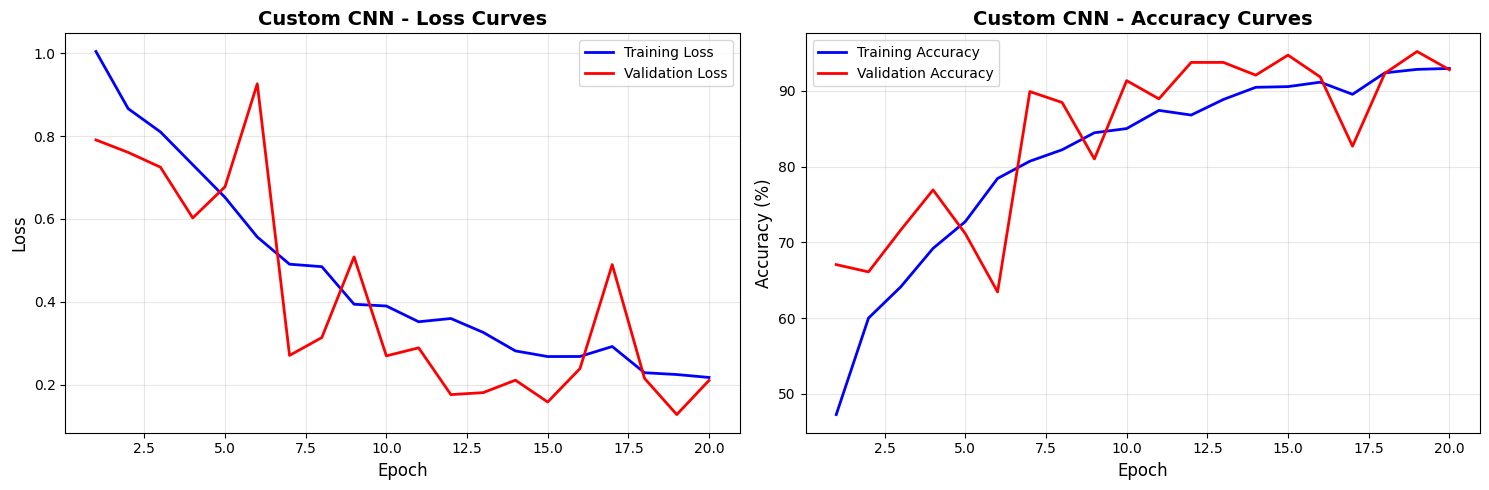

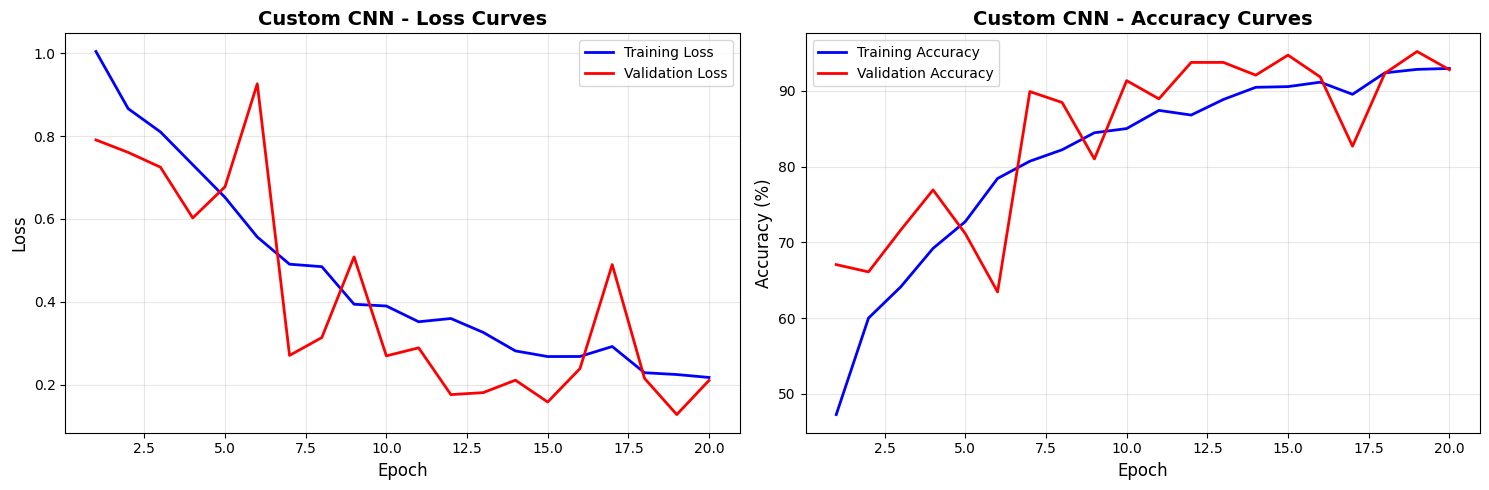

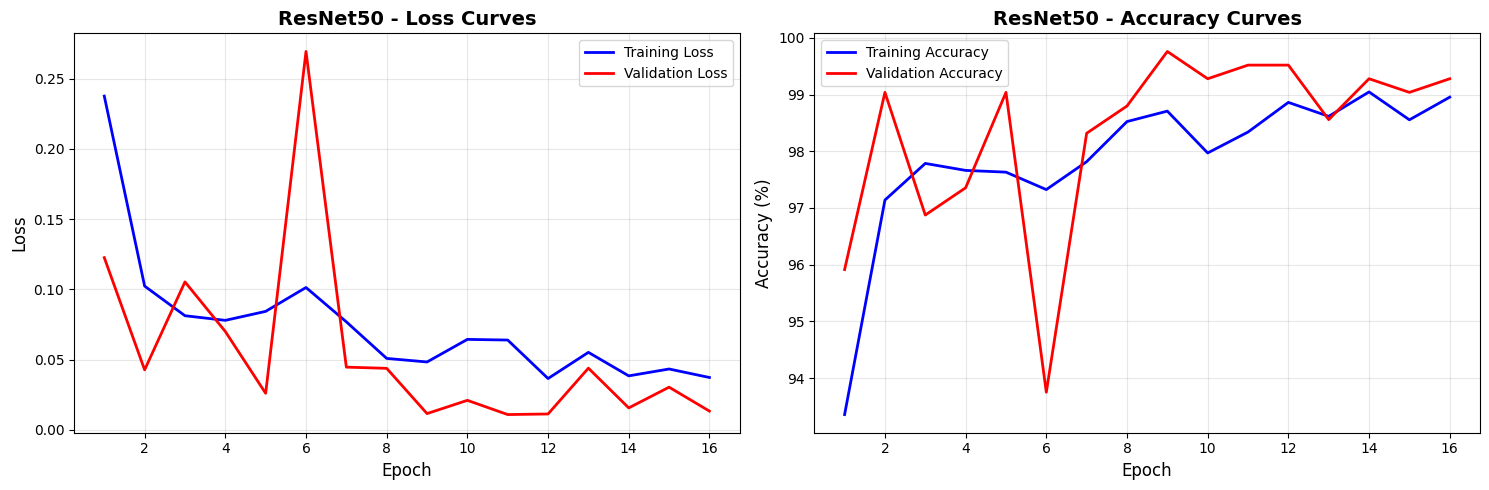

In [13]:
plot_training_history(cnn_history, model_name='Custom CNN')
plot_training_history(resnet_history, model_name='ResNet50')

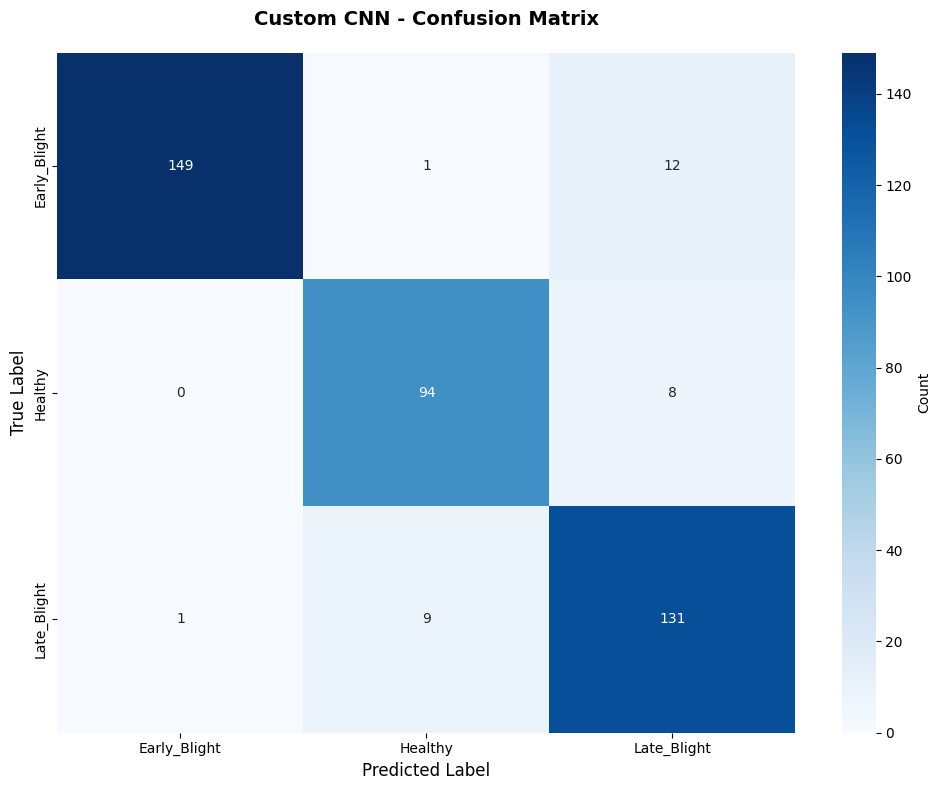

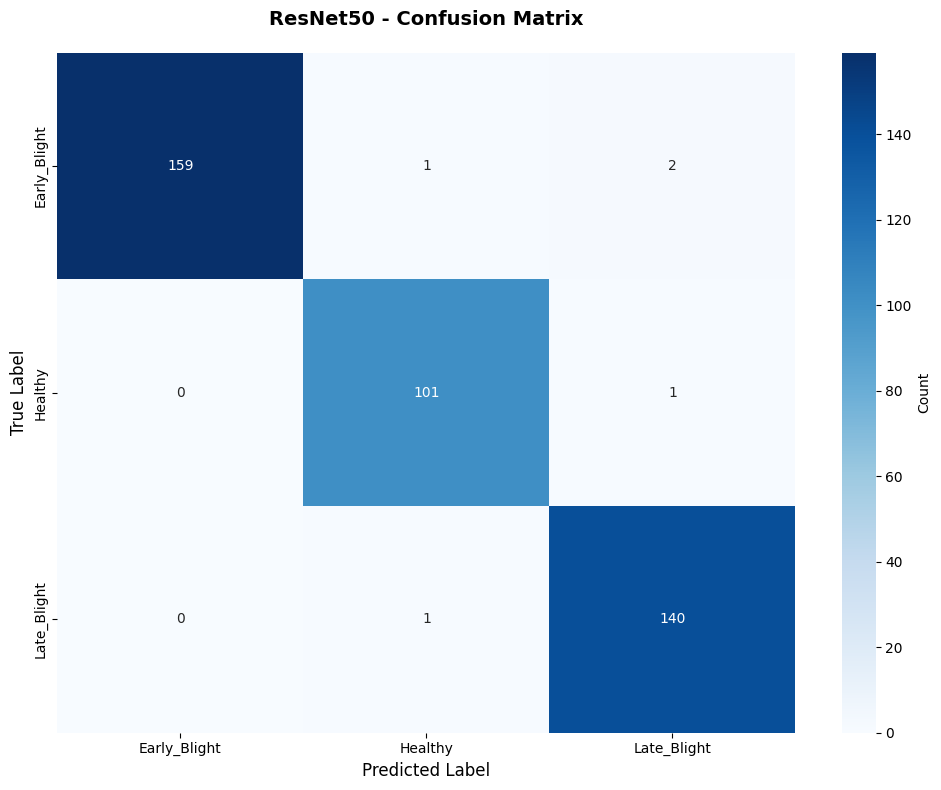

In [14]:
cnn_cm = confusion_matrix(cnn_true, cnn_pred)
resnet_cm = confusion_matrix(resnet_true, resnet_pred)

plot_confusion_matrix(cnn_cm, config.CLASS_NAMES, model_name='Custom CNN')
plot_confusion_matrix(resnet_cm, config.CLASS_NAMES, model_name='ResNet50')

## 6. Classification Reports

In [15]:
print("Custom CNN Classification Report:")
print("="*50)
print(generate_classification_report(cnn_true, cnn_pred, config.CLASS_NAMES))

print("\n\nResNet50 Classification Report:")
print("="*50)
print(generate_classification_report(resnet_true, resnet_pred, config.CLASS_NAMES))

Custom CNN Classification Report:
              precision    recall  f1-score   support

Early_Blight     0.9933    0.9198    0.9551       162
     Healthy     0.9038    0.9216    0.9126       102
 Late_Blight     0.8675    0.9291    0.8973       141

    accuracy                         0.9235       405
   macro avg     0.9216    0.9235    0.9217       405
weighted avg     0.9270    0.9235    0.9243       405



ResNet50 Classification Report:
              precision    recall  f1-score   support

Early_Blight     1.0000    0.9815    0.9907       162
     Healthy     0.9806    0.9902    0.9854       102
 Late_Blight     0.9790    0.9929    0.9859       141

    accuracy                         0.9877       405
   macro avg     0.9865    0.9882    0.9873       405
weighted avg     0.9878    0.9877    0.9877       405

